In [36]:
# Dependencies
import requests
import pandas as pd
from census import Census
import matplotlib.pyplot as plt
import scipy.stats as stats

In [37]:
crime_rate = pd.read_csv("Austin_project2.csv")

del crime_rate["Unnamed: 11"]
del crime_rate["Unnamed: 10"]
del crime_rate["Unnamed: 9"]
del crime_rate["Unnamed: 8"]
del crime_rate["Unnamed: 7"]
del crime_rate["Unnamed: 6"]
del crime_rate["Unnamed: 5"]
del crime_rate["Unnamed: 4"]


cleaned_austin= crime_rate.dropna(how="all")
#cleaned_austin['YEAR'] = pd.to_datetime(cleaned_austin['Year'], format='%Y')
cleaned_austin["YEAR"] = cleaned_austin["YEAR"].astype(int)
cleaned_austin["TOTAL POPULATION"] = cleaned_austin["TOTAL POPULATION"].astype(int)
cleaned_austin["CRIME RATE PER 100000"] = cleaned_austin["CRIME RATE PER 100000"].astype(int)
cleaned_austin["NUMBER OFFENSES"] = cleaned_austin["NUMBER OFFENSES"].astype(int)
cleaned_austin

C:\Users\r_kar\AppData\Local\Temp\ipykernel_42948\2357070361.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_austin["YEAR"] = cleaned_austin["YEAR"].astype(int)
C:\Users\r_kar\AppData\Local\Temp\ipykernel_42948\2357070361.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_austin["TOTAL POPULATION"] = cleaned_austin["TOTAL POPULATION"].astype(int)
C:\Users\r_kar\AppData\Local\Temp\ipykernel_42948\2357070361.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,YEAR,TOTAL POPULATION,NUMBER OFFENSES,CRIME RATE PER 100000
0,2013,1764397,62166,3523
1,2014,1821227,58644,3220
2,2015,1885799,56655,3004
3,2016,1931656,56374,2918
4,2017,1987842,53688,2700
5,2018,2042795,54867,2685
6,2019,2084952,58037,2783
7,2020,2148759,59749,2780
8,2021,2200333,57795,2626
9,2022,2265330,60493,2670


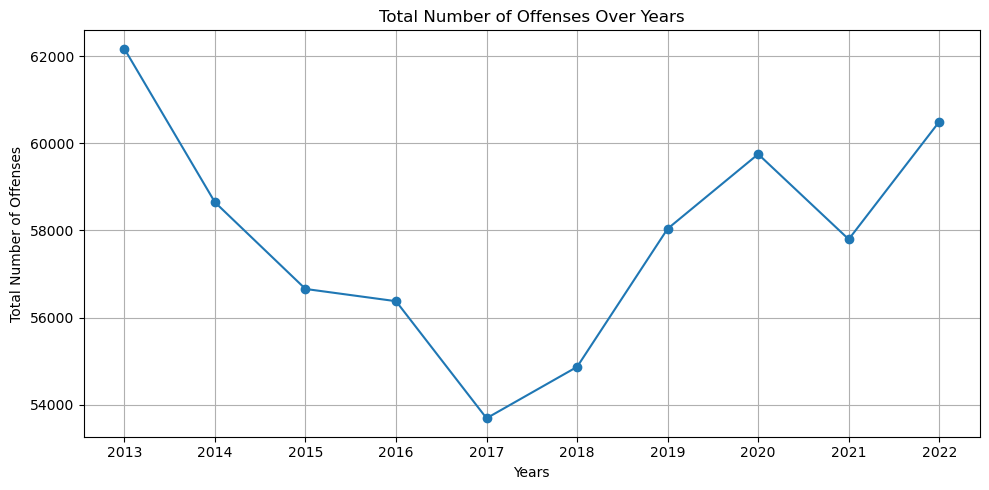

In [38]:
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(cleaned_austin["YEAR"], cleaned_austin["NUMBER OFFENSES"], marker='o')  # Line chart
plt.title('Total Number of Offenses Over Years')  # Title of the plot
plt.xlabel('Years')  # Label for x-axis
plt.ylabel('Total Number of Offenses')  # Label for y-axis
plt.grid(True)  # Optional: adds a grid
plt.xticks(cleaned_austin['YEAR'])  # Set x-axis ticks to be exact years in the DataFrame
plt.tight_layout()  # Optional: adjusts subplots to give some padding
plt.show()

C:\Users\r_kar\AppData\Local\Temp\ipykernel_42948\4180328018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_austin["Population Change %"] = round(cleaned_austin["TOTAL POPULATION"].pct_change() * 100,2)
C:\Users\r_kar\AppData\Local\Temp\ipykernel_42948\4180328018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_austin["Crime Rate Change %"] = round(cleaned_austin["CRIME RATE PER 100000"].pct_change() * 100,2)


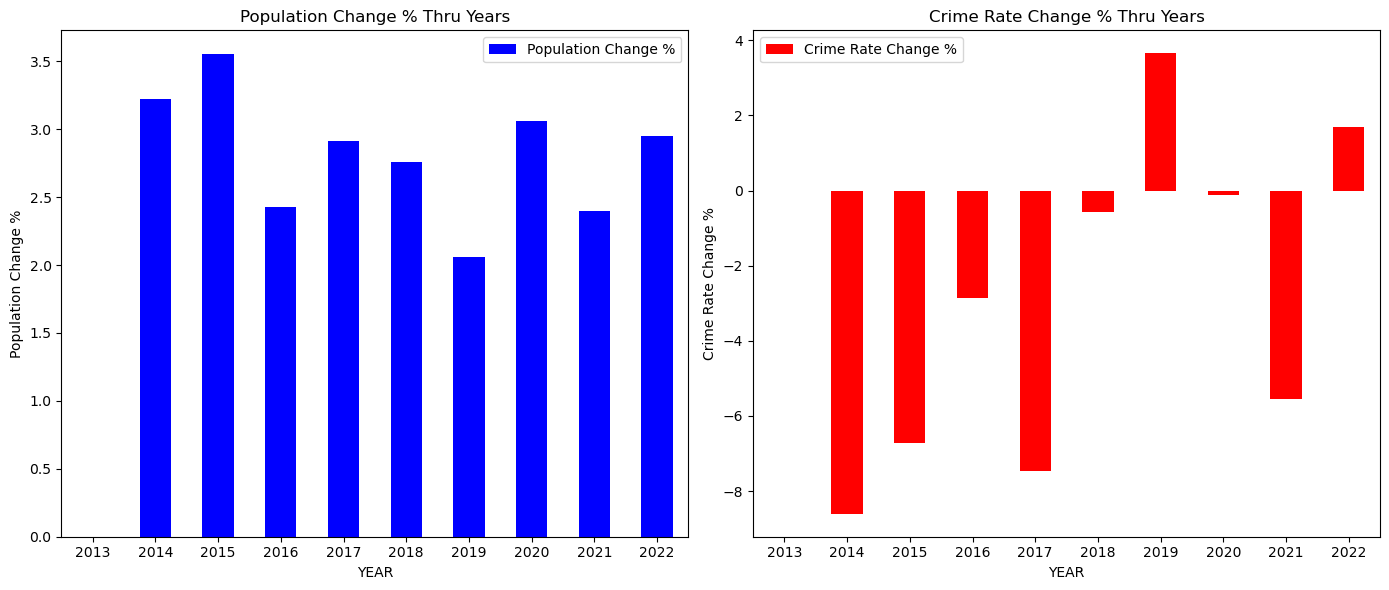

In [50]:
# Calculate the population and crime rate change of the metropolitan city over 10 years 
cleaned_austin["Population Change %"] = round(cleaned_austin["TOTAL POPULATION"].pct_change() * 100,2)
cleaned_austin["Crime Rate Change %"] = round(cleaned_austin["CRIME RATE PER 100000"].pct_change() * 100,2)


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))  

# Plot Population Change %
cleaned_austin.plot(kind='bar', x='YEAR', y='Population Change %', ax=ax1, color='blue', title='Population Change % Thru Years')
ax1.set_xlabel('YEAR')
ax1.set_ylabel('Population Change %')
ax1.set_xticklabels(cleaned_austin['YEAR'], rotation=0)  

# Plot Crime Rate Change %
cleaned_austin.plot(kind='bar', x='YEAR', y="Crime Rate Change %", ax=ax2, color='red', title='Crime Rate Change % Thru Years')
ax2.set_xlabel('YEAR')
ax2.set_ylabel("Crime Rate Change %")
ax2.set_xticklabels(cleaned_austin['YEAR'], rotation=0)  

# Show the plot
plt.tight_layout()  
plt.show()

In [39]:
#covid and non-covid years analysis

In [40]:
covid_years=[2020,2021]
crime_rate_covid_df=cleaned_austin[cleaned_austin["YEAR"].isin(covid_years)]
mean_crime_rate_covid = crime_rate_covid_df["CRIME RATE PER 100000"].mean()
mean_crime_rate_covid

2703.0

In [41]:
austin_non_covid_df=cleaned_austin[~cleaned_austin["YEAR"].isin(covid_years)]
mean_crime_rate_non_covid = austin_non_covid_df["CRIME RATE PER 100000"].mean()
mean_crime_rate_non_covid 

2937.875

In [43]:
# Running t-test on two independent population on null  hypothesis
t_stat, p_value = stats.ttest_ind(crime_rate_covid_df["CRIME RATE PER 100000"],austin_non_covid_df["CRIME RATE PER 100000"], equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -1.7800066407021289
P-value: 0.1287527877239075
